# Analiza ataku z wykorzytaniem metod uczenia maszynowego
* Bartosz Włodarski
* Maciej Zdański

## Wykrywanie anomalii w logach za pomocą metod uczenia maszynowego

W celu analizy anomalii w logach, zostaną zastosowane dwie metody uczenia maszynowego: Isolation Forest oraz Local Outlier Factor (LOF).

**Narzędzia:**

* **Python:** Język programowania do implementacji metod uczenia maszynowego.
* **Pandas:** Biblioteka Pythona do operacji na danych, takich jak czyszczenie, filtrowanie i agregowanie.
* **scikit-learn (sklearn):** Biblioteka Pythona zawierająca modele uczenia maszynowego, w tym Isolation Forest i LOF.
* **Matplotlib:** Biblioteka Pythona do tworzenia wykresów i wizualizacji danych.




In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Podstawowe dane

Analiza wszystkich logów, przed podziałem na normalne logi i anomalie.

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("result_data.csv")

# Preprocessing: Convert Time column to datetime
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df.set_index('Time', inplace=True)


def analyze_network_data(df):
    # Analysis
    # Total number of records
    total_records = df.shape[0]

    # Time range
    time_range_start = df.index.min()
    time_range_end = df.index.max()

    # Top 5 SrcDevice with most SrcBytes
    top5_srcdevice_srcbytes = df.groupby('SrcDevice')['SrcBytes'].sum().nlargest(5)

    # Print results
    print(f"Total number of records: {total_records}")
    print(f"Time range: From {time_range_start} to {time_range_end}\n")

    print("TOP 5 Source Devices with Most Source Bytes:")
    print(top5_srcdevice_srcbytes)

# Call the function with the sample data
analyze_network_data(df)

Total number of records: 1048576
Time range: From 1970-02-13 00:00:00 to 1970-02-13 00:08:56

TOP 5 Source Devices with Most Source Bytes:
SrcDevice
Comp498576    104109228714
Comp669997     99460215361
Comp020240     87650773121
Comp410198     12642809844
Comp252302      9152624318
Name: SrcBytes, dtype: int64


## Podsumowanie wyników

**Całkowita liczba rekordów:** 1048576

**Zakres czasu:** od 1970-02-13 00:00:00 do 1970-02-13 00:08:56

## TOP 5 urządzeń źródłowych przesyłających najwięcej bajtów

| Urządzenie źródłowe | Liczba bajtów |
|---|---|
| Comp498576 | 104109228714 |
| Comp669997 | 99460215361 |
| Comp020240 | 87650773121 |
| Comp410198 | 12642809844 |
| Comp252302 | 9152624318 |



## Analiza z wykorzystaniem modelu `IsolationForest`



Algorytm `Isolation Forest` jest nienadzorowanym algorytmem uczenia maszynowego stosowanym do wykrywania anomalii. Opiera się on na zasadzie, że anomalie to punkty danych, które są nieliczne i różnią się od większości pozostałych danych.

Isolation Forest ma kilka zalet w zakresie wykrywania anomalii:

* Może wydajnie obsługiwać dane o dużej liczbie wymiarów.
* Do szkolenia nie wymaga dużej ilości danych.
* Jest odporny na występowanie outlierów i nie wymaga strojenia hiperparametrów.

In [ ]:
# Select features for anomaly detection
features = df[['Duration', 'SrcPackets', 'DstPackets', 'SrcBytes', 'DstBytes']]

# Train Isolation Forest model
model = IsolationForest(contamination=0.01)
model.fit(features)

# Predict outliers/anomalies
predictions = model.predict(features)
anomalies = df[predictions == -1]

# Print number of anomalies
number_of_logs = df.size
number_of_anomalies = anomalies.size
print(f"Number of logs: {number_of_logs}")
print(f"Number of anomalies: {number_of_anomalies}")
print(f"Percent of anomalies: {100 * number_of_anomalies / number_of_logs} %")

# Print the anomalies
print("Anomalies:")
anomalies

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of logs: 10485760
Number of anomalies: 104690
Percent of anomalies: 0.9984016418457031 %
Anomalies:


,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
Time,,,,,,,,,,
1970-02-13 00:00:00,1,Comp005825,EnterpriseAppServer,6,Port92964,80,65,106,3440,153360
1970-02-13 00:00:00,1,Comp373286,Comp758799,6,Port66498,443,45,135,4599,166849
1970-02-13 00:00:00,1,Comp216639,Comp594892,6,Port84510,Port95695,177,94,19278,15823
1970-02-13 00:00:00,2,Comp252302,Comp368295,6,Port24005,Port80111,313,311,82128,197226
1970-02-13 00:00:00,3,Comp955278,Comp431181,6,Port65224,Port63735,95,106,4948,64661
...,...,...,...,...,...,...,...,...,...,...
1970-02-13 00:08:55,14118,Comp987487,Comp275646,17,Port50757,53,352,0,23584,0
1970-02-13 00:08:55,26263,Comp987487,Comp275646,17,Port50757,53,742,0,49714,0
1970-02-13 00:08:55,34607,Comp987487,Comp275646,17,Port50757,53,1047,0,70149,0


### Próba identyfikacji atakującego
Próba identyfikacji na podstawie liczby wysłanych bajtów

In [ ]:
dstDevice_srcBytes_sum = anomalies.groupby('DstDevice')['SrcBytes'].sum()
sorted_dstDevices_by_srcBytes = dstDevice_srcBytes_sum.sort_values(ascending=False)
sorted_dstDevices_by_srcBytes

DstDevice
IP120111      291220217196
Comp356494     14909345834
Comp584901      9181033666
Comp810224      8994780312
Comp673474      7445477696
                  ...     
Comp162796               0
Comp805594               0
Comp142958               0
Comp458242               0
Comp178880               0
Name: SrcBytes, Length: 360, dtype: int64

In [ ]:
dstDevice_srcBytes_sum = anomalies.groupby('DstDevice')['SrcPackets'].sum()
sorted_dstDevices_by_srcBytes = dstDevice_srcBytes_sum.sort_values(ascending=False)
sorted_dstDevices_by_srcBytes

DstDevice
IP120111      1252798748
Comp356494      32865049
Comp584901      29125503
Comp288725      28146379
Comp040492      25851433
                 ...    
Comp173349             0
Comp074088             0
Comp379719             0
Comp358674             0
Comp399266             0
Name: SrcPackets, Length: 360, dtype: int64

`IP120111` otrzymał największą ilość pakietów/bajtów i jest największym podejrzanym jeśli chodzi o przeprowadzenie ataku

### Analiza anomalii wykrytych przez model `IsolationForest`


In [ ]:
analyze_network_data(anomalies)

Total number of records: 10486
Time range: From 1970-02-13 00:00:00 to 1970-02-13 00:08:55

TOP 5 Source Devices with Most Source Bytes:
SrcDevice
Comp498576    104109228714
Comp669997     99460215361
Comp020240     87650773121
Comp410198     12611236062
Comp252302      9152447154
Name: SrcBytes, dtype: int64

TOP 5 Destination Devices with Most Destination Bytes:
DstDevice
Comp996415    4462935518
Comp947445    3879677077
Comp010412    3741066509
Comp191963    1524293557
Comp476860    1016960432
Name: DstBytes, dtype: int64


## Podsumowanie wyników

**Całkowita liczba rekordów:** 10486
**Zakres czasu:** od 1970-02-13 00:00:00 do 1970-02-13 00:08:55

## TOP 5 urządzeń źródłowych przesyłających najwięcej bajtów

| Urządzenie źródłowe | Liczba bajtów |
|---|---|
| Comp498576 | 104109228714 |
| Comp669997 | 99460215361 |
| Comp020240 | 87650773121 |
| Comp410198 | 12612719307 |
| Comp252302 | 9152447154 |

## TOP 5 urządzeń docelowych odbierających najwięcej bajtów

| Urządzenie docelowe | Liczba bajtów |
|---|---|
| Comp996415 | 4462935518 |
| Comp947445 | 3873081333 |
| Comp010412 | 3741066509 |
| Comp191963 | 1524644706 |
| Comp476860 | 1016719152 |


## Wykresy

### Analiza rozkładu wykrytych anomalii

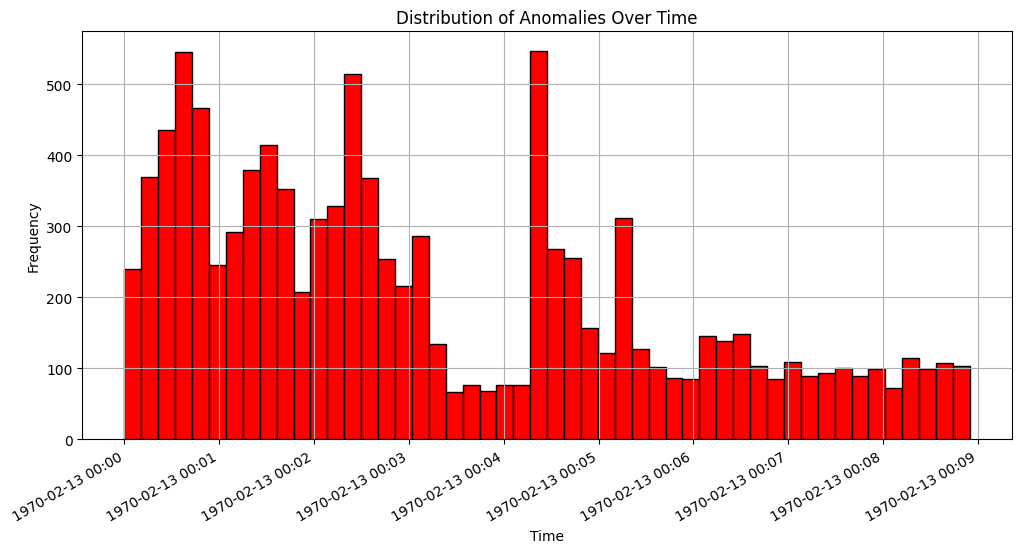

In [ ]:
def show_anomalies_hist(data, bins=50):
    plt.figure(figsize=(12, 6))

    # Plotting histogram
    plt.hist(data.index, bins=bins, color='red', edgecolor='black')

    # Formatting the x-axis to show dates
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    plt.gcf().autofmt_xdate()  # Rotation for date labels

    # Adding titles and labels
    plt.title('Distribution of Anomalies Over Time')
    plt.xlabel('Time')
    plt.ylabel('Frequency')

    # Adding grid
    plt.grid(True)
    plt.show()

show_anomalies_hist(anomalies)

Z histogramu rozkładu anomalii wynika, że model wykrył najwięcej ataków w oknie czasowym *00:00-00:03* oraz *00:04-00:05*

### Rozkład anomalii ze względu na poszczególne atrybuty
Na wykresach przedstawione są punkty (logi) wraz z czerwonym oznaczeniem tego czy zostały zakwalifikowane do anomalii. Każdy wykres skupia się na jednym atrybucie.

In [ ]:
def show_column_with_anomalies(column):
    plt.figure(figsize=(12, 6))
    plt.scatter(anomalies.index, anomalies[column], color='red', label='Outliers', s=50)
    plt.scatter(features.index, features[column], color='blue', label='Normal Data', marker='o', s=5)
    plt.title(f'Time Series of {column} with Outliers')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

#### Czas trwania - Duration

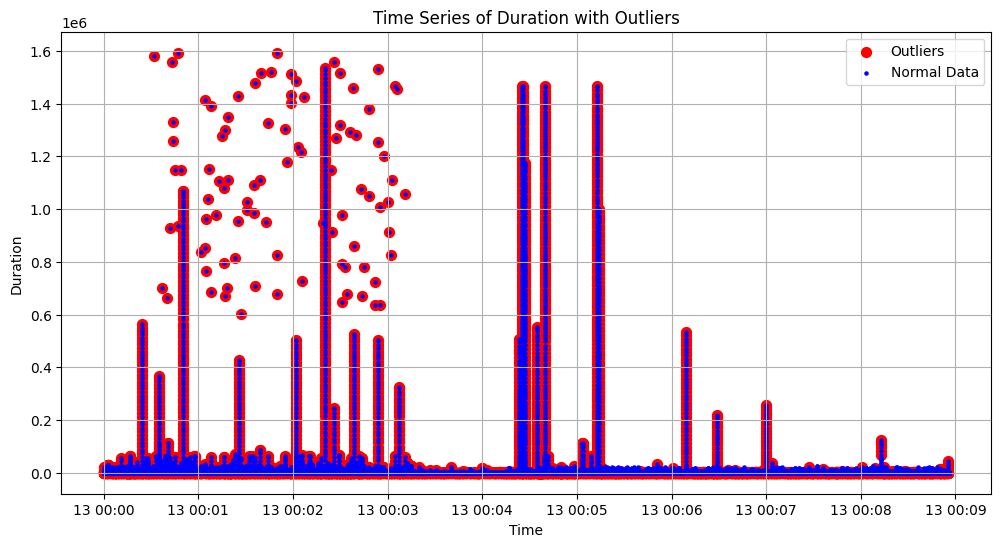

In [ ]:
show_column_with_anomalies("Duration")

#### Pakiety wychodzące - SrcPackets

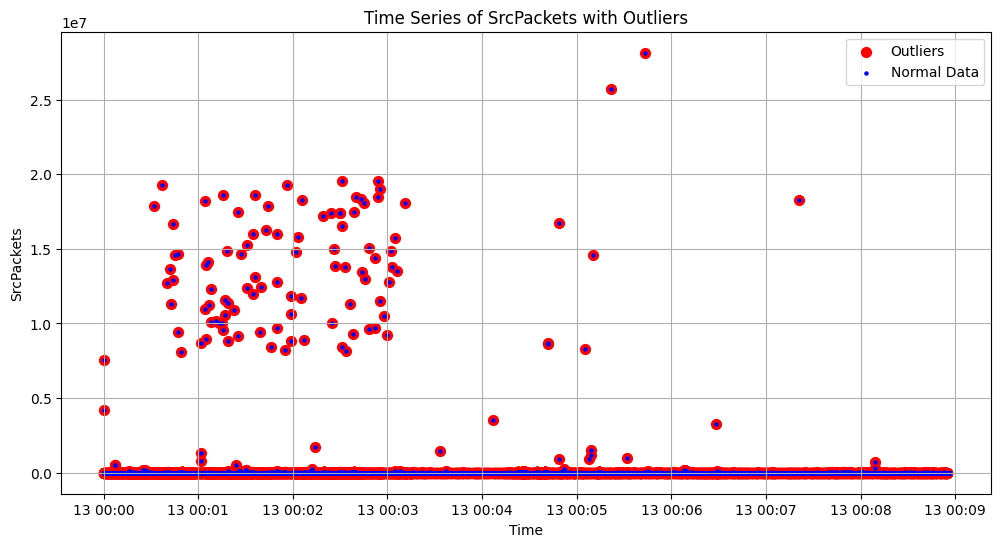

In [ ]:
show_column_with_anomalies("SrcPackets")

#### Pakiety wchodzące - DstPackets

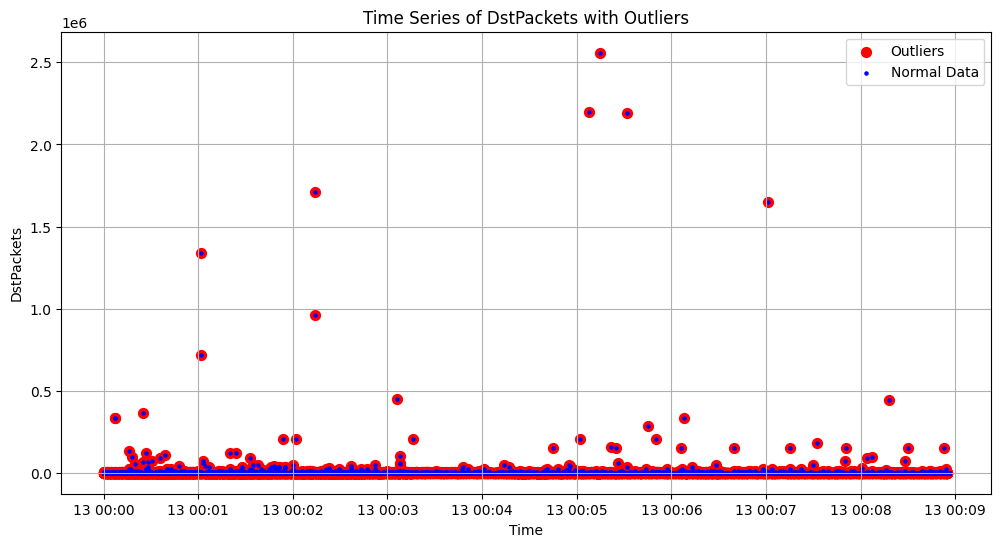

In [ ]:
show_column_with_anomalies("DstPackets")

### Bajty wychodzące - SrcBytes

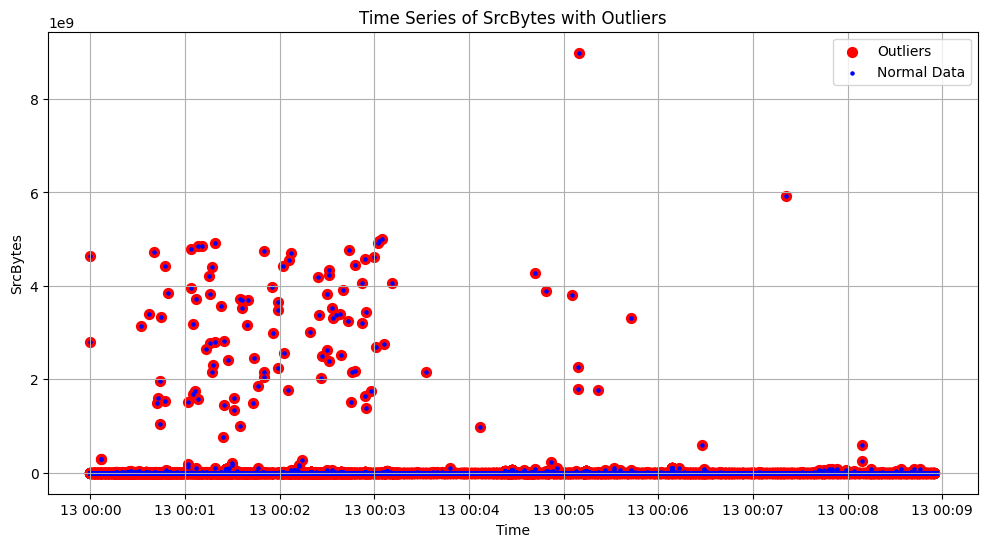

In [ ]:
show_column_with_anomalies("SrcBytes")

#### DstBytes - Bajty wychodzące

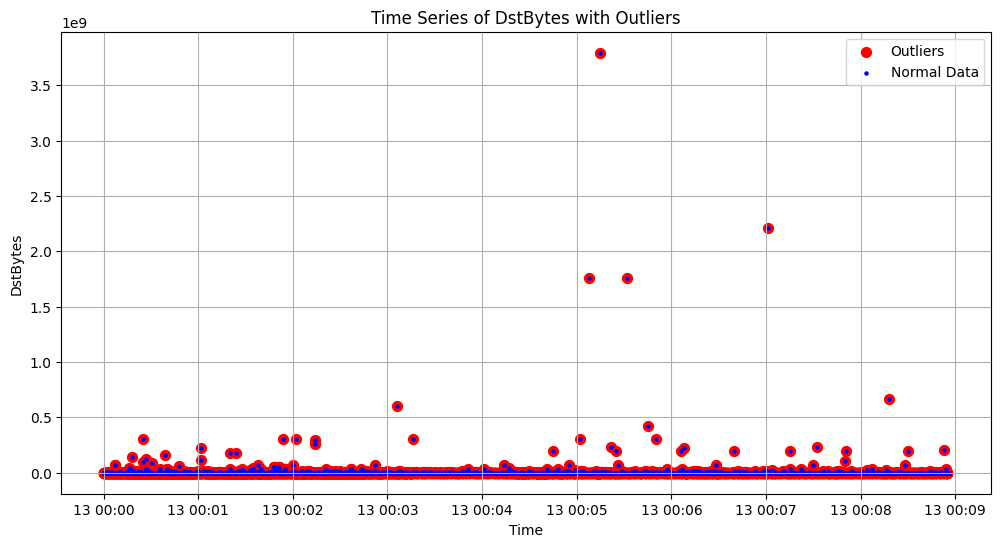

In [ ]:
show_column_with_anomalies("DstBytes")

## Podsumowanie dla modelu `IsolationForest`

* urządzenia podejrzane o bycie zaatakowanym:
** Comp498576
** Comp669997
** Comp020240
** Comp410198
** Comp252302

* urządzenie podejrzane o bycie atakującym:
**  IP120111

* okres ataku:
** 00:00-00:03 oraz 00:04-00:05


## Analiza z wykorzystaniem modelu `LocalOutlierFactor`


Local Outlier Factor (LOF) jest nienadzorowanym algorytmem wykrywania anomalii, służącym do identyfikowania outlierów (wartości odstających) w zestawach danych.  Oblicza on odchylenie gęstości lokalnej danego punktu względem jego sąsiadów i oznacza punkty o znacznie niższej gęstości jako anomalie. LOF przypisuje każdemu punktowi danych  wartość anomalii, przy czym wyższe wartości wskazują na większe prawdopodobieństwo bycia outlierem. Algorytm ten jest szczególnie skuteczny w wykrywaniu outlierów w zestawach danych o dużej liczbie wymiarów i jest stosunkowo odporny na zróżnicowaną gęstość w różnych obszarach zestawu danych.


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# Train Local Outlier Factor model
lof_model = LocalOutlierFactor(contamination=0.1)
lof_predictions = lof_model.fit_predict(features)
lof_anomalies = df[lof_predictions == -1]

# Print number of anomalies
number_of_logs = df.size
number_of_lof_anomalies = lof_anomalies.size
print(f"Number of logs: {number_of_logs}")
print(f"Number of anomalies: {number_of_lof_anomalies}")
print(f"Percent of anomalies: {100 * number_of_lof_anomalies / number_of_logs} %")

# Print the anomalies
print("Anomalies using Local Outlier Factor:")
lof_anomalies

Number of logs: 10485760
Number of anomalies: 1048580
Percent of anomalies: 10.000038146972656 %
Anomalies using Local Outlier Factor:


,Duration,SrcDevice,DstDevice,Protocol,SrcPort,DstPort,SrcPackets,DstPackets,SrcBytes,DstBytes
Time,,,,,,,,,,
1970-02-13 00:00:00,0,Comp965724,ActiveDirectory,6,Port47600,88,6,0,1971,0
1970-02-13 00:00:00,0,Comp364445,Comp977866,6,Port64091,80,5,0,778,0
1970-02-13 00:00:00,0,Comp097048,ActiveDirectory,6,Port96807,88,6,0,2811,0
1970-02-13 00:00:00,0,Comp073375,Comp186884,6,Port38291,443,3,1,144,48
1970-02-13 00:00:00,0,Comp584379,ActiveDirectory,6,Port30950,88,6,0,2267,0
...,...,...,...,...,...,...,...,...,...,...
1970-02-13 00:08:56,1,Comp867980,Comp200569,6,Port41902,80,5,0,334,0
1970-02-13 00:08:56,1,Comp867980,Comp200569,6,Port87001,80,5,0,334,0
1970-02-13 00:08:56,1,Comp867980,ActiveDirectory,6,Port73523,88,4,0,495,0


### Próba identyfikacji atakującego

In [ ]:
dstDevice_srcBytes_sum = lof_anomalies.groupby('DstDevice')['SrcBytes'].sum()
sorted_dstDevices_by_srcBytes = dstDevice_srcBytes_sum.sort_values(ascending=False)
sorted_dstDevices_by_srcBytes

DstDevice
IP120111      72672237059
Comp356494    14909345834
Comp673474     4641241288
Comp810224     3880116161
Comp141988     2207473854
                 ...     
Comp718212              0
Comp720737              0
Comp730322              0
Comp732058              0
Comp619467              0
Name: SrcBytes, Length: 1722, dtype: int64

In [ ]:
dstDevice_srcBytes_sum = lof_anomalies.groupby('DstDevice')['SrcPackets'].sum()
sorted_dstDevices_by_srcBytes = dstDevice_srcBytes_sum.sort_values(ascending=False)
sorted_dstDevices_by_srcBytes

DstDevice
IP120111      266305742
Comp356494     32865049
Comp584901     12210014
Comp673474      7568869
Comp810224      5123682
                ...    
Comp473652            0
Comp296915            0
Comp720737            0
Comp718212            0
Comp716559            0
Name: SrcPackets, Length: 1722, dtype: int64

`IP120111` otrzymał największą ilość pakietów/bajtów i jest największym podejrzanym jeśli chodzi o przeprowadzenie ataku

### Analiza anomalii wykrytych przez model `LocalOutlierFactor`


In [ ]:
analyze_network_data(lof_anomalies)

Total number of records: 104858
Time range: From 1970-02-13 00:00:00 to 1970-02-13 00:08:56

TOP 5 Source Devices with Most Source Bytes:
SrcDevice
Comp498576    32613073219
Comp669997    22287662729
Comp020240    17771501111
Comp269969     8989776921
Comp339863     5919585488
Name: SrcBytes, dtype: int64


## Podsumowanie przesyłu danych (1970-02-13 00:00:00 - 1970-02-13 00:08:56)

**Całkowita liczba rekordów:** 104858

## TOP 5 urządzeń źródłowych przesyłających najwięcej bajtów

| Urządzenie źródłowe | Liczba bajtów |
|---|---|
| Comp498576 | 32613073219 |
| Comp669997 | 22287662729 |
| Comp020240 | 17771501111 |
| Comp269969 | 8989776921 |
| Comp339863 | 5919585488 |






## Wykresy

### Analiza rozkładu wykrytych anomalii

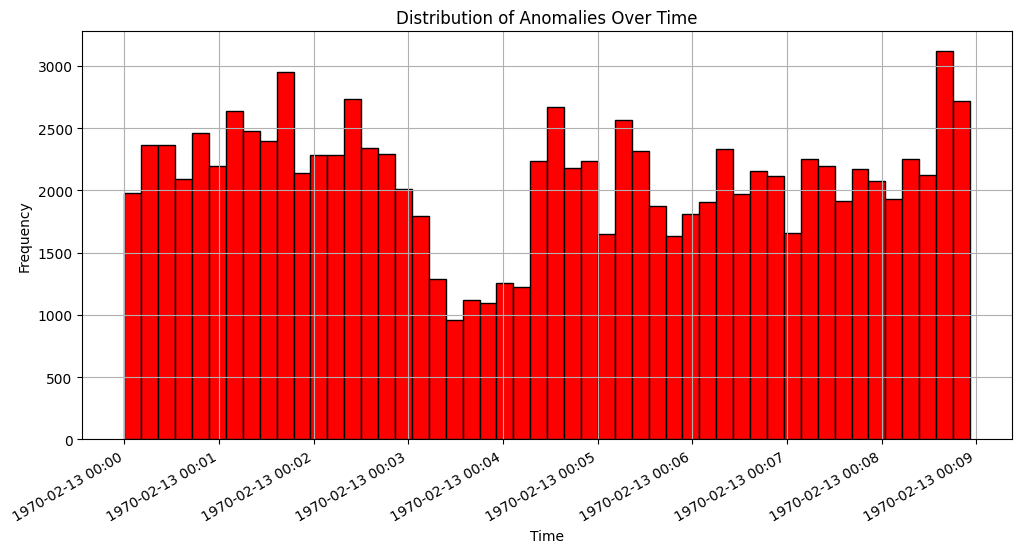

In [ ]:
show_anomalies_hist(lof_anomalies)

W przypadku modelu `Local Outlier Factor` wyniki rozkładu są o wiele bardziej jednorodne w porównaniu z `Isolation Forest` przez co trudno jest wskazać możliwe okno czasowe ataku.

### Rozkład anomalii ze względu na poszczególne atrybuty
Na wykresach przedstawione są punkty (logi) wraz z czerwonym oznaczeniem tego czy zostały zakwalifikowane do anomalii. Każdy wykres skupia się na jednym atrybucie.

In [ ]:
def show_column_with_lof_anomalies(column):
    plt.figure(figsize=(12, 6))
    plt.scatter(lof_anomalies.index, lof_anomalies[column], color='red', label='Outliers', s=50)
    plt.scatter(features.index, features[column], color='blue', label='Normal Data', marker='o', s=5)
    plt.title(f'Time Series of {column} with Outliers')
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

#### Czas trwania - Duration

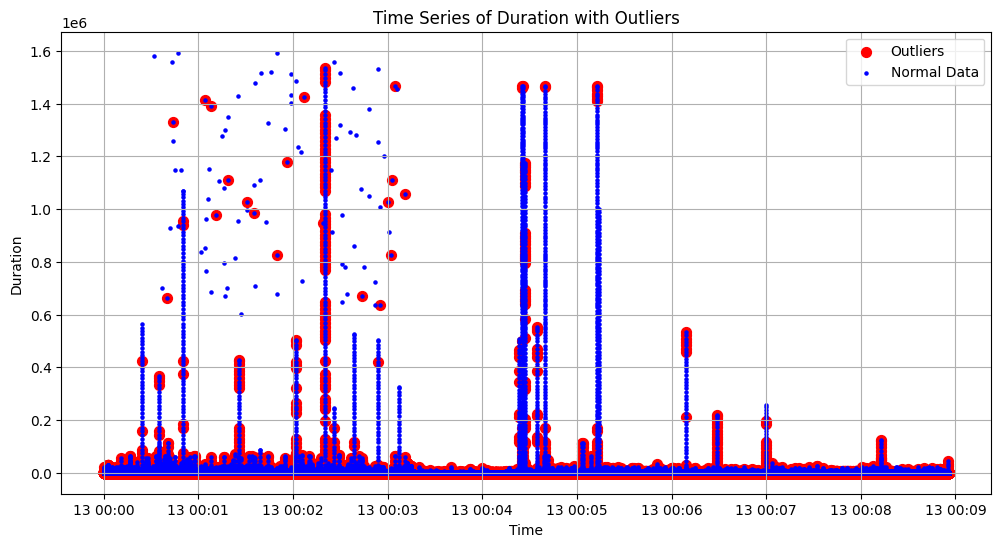

In [ ]:
show_column_with_lof_anomalies("Duration")

#### Pakiety wychodzące - SrcPackets

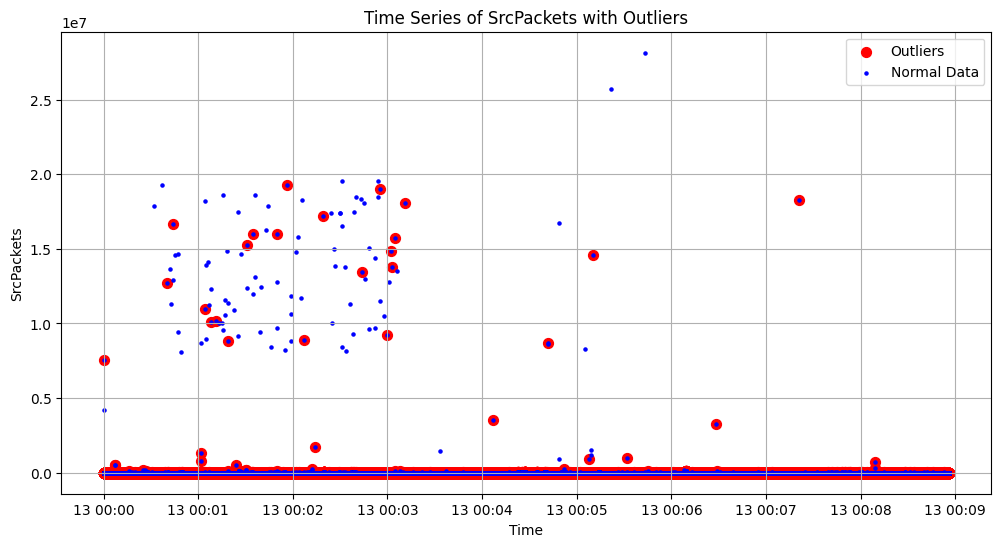

In [ ]:
show_column_with_lof_anomalies("SrcPackets")

#### Pakiety wychodzące - DstPackets

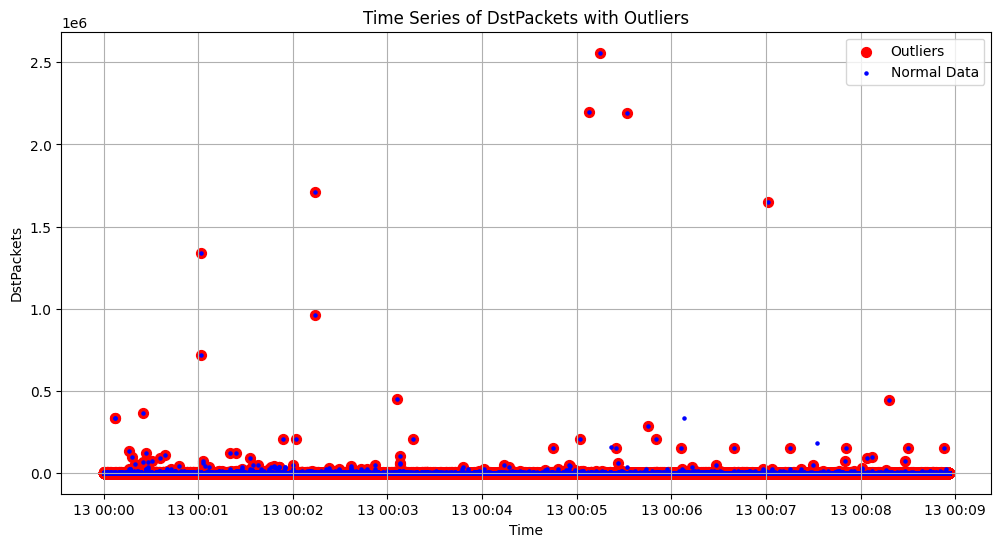

In [ ]:
show_column_with_lof_anomalies("DstPackets")

#### Bajty wychodzące - SrcBytes

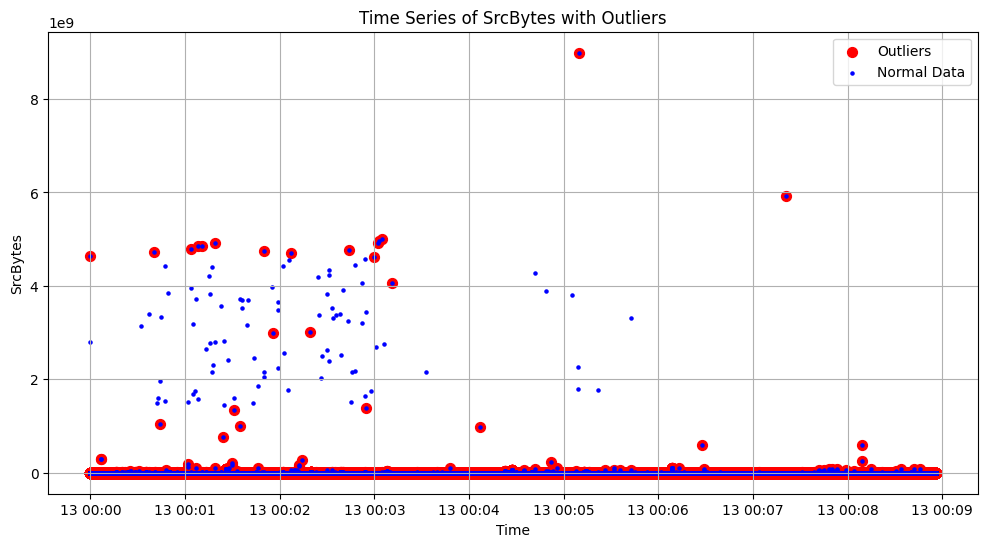

In [ ]:
show_column_with_lof_anomalies("SrcBytes")

#### DstBytes - pakiety wchodzące

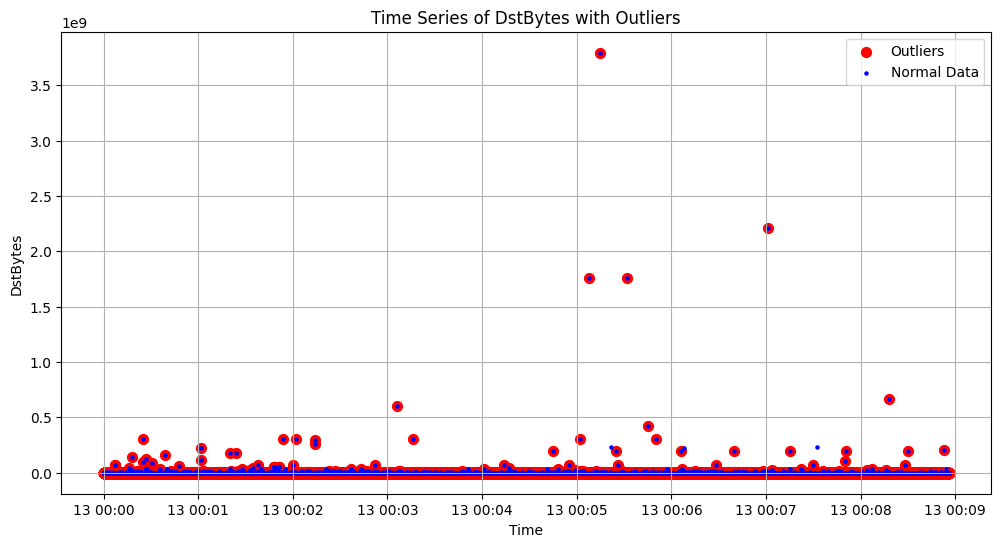

In [ ]:
show_column_with_lof_anomalies("DstBytes")